# Shopify Intern Chalange Fall 2022
### By Daniel Apostoli

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

Here I will load the data set and sort it by order_amount column. Right away you see that the range for order_amount is very large.

In [61]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.sort_values(by='order_amount')


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
158,159,92,795,90,1,credit_card,2017-03-29 3:07:12
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
4760,4761,92,937,90,1,debit,2017-03-20 7:37:28
4923,4924,92,965,90,1,credit_card,2017-03-09 5:05:11
4932,4933,92,823,90,1,credit_card,2017-03-24 2:17:13
...,...,...,...,...,...,...,...
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00


Here I am looking at different descriptive statistics. The 50% row is equivalant to the median. You can see the calculated value from the question as the mean for order_amount column.

In [62]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Here I graphed a histogam. The data was heavly skewed to the right. I used a logrithmic scale to better represent the data on the histogram. 
I also ploted a vertical line representing the mean and a vertical line representing the median. You can see that the large values are pulling
the mean to the right.

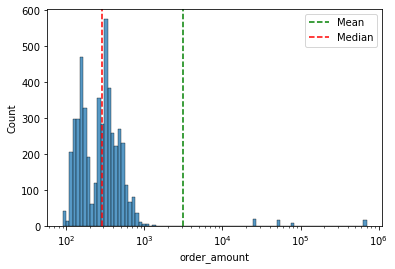

Mean: 3145.128
Median: 284.0


In [63]:
log_graph = sns.histplot(df, x='order_amount', log_scale=True)
Log_mean_line = log_graph.axvline(np.mean(df['order_amount']), ls='--', color='green')
log_median_line = log_graph.axvline(np.median(df['order_amount']), ls='--', color='red')
log_graph.legend(['Mean', 'Median'])
plt.show()
df_mean = np.mean(df['order_amount'])
df_median = np.median(df['order_amount'])
print(f'Mean: {df_mean}\nMedian: {df_median}')

Here I cut out the outliers by removing all values that are larger than the 0.98 quantile. I plotted the median and mean of this new dataset as vertical lines. This will allow the mean to be a better respresentation of the data. I would still use the median as a value to represent the data.

In [64]:
q = df['order_amount'].quantile(0.98)
df_outlier_removed = df[df['order_amount'] < q].sort_values(by='order_amount')
df_outlier_removed['order_amount']


4414     90
4923     90
4932     90
3187     90
322      90
       ... 
2136    790
4870    790
1628    800
4619    800
1923    800
Name: order_amount, Length: 4900, dtype: int64

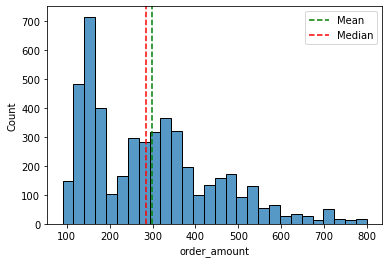

Mean: 297.67
Median: 284.0


In [65]:
graph = sns.histplot(df_outlier_removed, x='order_amount')
mean_line = graph.axvline(np.mean(df_outlier_removed['order_amount']), ls='--', color='green')
median_line = graph.axvline(np.median(df_outlier_removed['order_amount']), ls='--', color='red')
graph.legend(['Mean', 'Median'])
plt.show()

df_outlier_removed_mean = np.mean(df_outlier_removed['order_amount'])
df_outlier_removed_median = np.median(df_outlier_removed['order_amount'])
print(f'Mean: {round(df_outlier_removed_mean, 2)}\nMedian: {df_outlier_removed_median}')

In [66]:
columns = ['shop_id', 'order_amount', 'total_items']
df2 = df[columns]
df2['total_orders'] = 1
df2 = df2.groupby(by='shop_id').sum()
df2['amount_per_order'] = df2['order_amount'] / df2['total_orders']
df2['amount_per_item'] = df2['order_amount'] / df2['total_items']
df2['items_per_order'] = df2['total_items'] / df2['total_orders']
df2 = df2.round(2)
df2.sort_values('amount_per_order')

C:\Users\danie\AppData\Local\Temp/ipykernel_7104/602510962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_orders'] = 1


,order_amount,total_items,total_orders,amount_per_order,amount_per_item,items_per_order
shop_id,,,,,,
92,6840,76,42,162.86,90.0,1.81
2,9588,102,55,174.33,94.0,1.85
32,7979,79,42,189.98,101.0,1.88
100,8547,77,40,213.68,111.0,1.92
53,14560,130,68,214.12,112.0,1.91
...,...,...,...,...,...,...
38,13680,72,35,390.86,190.0,2.06
90,19758,111,49,403.22,178.0,2.27
50,17756,92,44,403.55,193.0,2.09


In [67]:
df2.describe()

,order_amount,total_items,total_orders,amount_per_order,amount_per_item,items_per_order
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.572564e+05,439.360000,50.000000,3136.834700,407.990000,8.652600
std,1.216218e+06,3396.366111,7.287737,23935.880965,2557.462906,66.590776
min,6.840000e+03,67.000000,35.000000,162.860000,90.000000,1.730000
25%,1.293050e+04,88.000000,44.750000,263.672500,132.750000,1.910000
50%,1.488750e+04,100.000000,50.000000,308.890000,153.000000,1.980000
75%,1.760000e+04,111.250000,55.000000,336.627500,168.250000,2.080000
max,1.199018e+07,34063.000000,68.000000,235101.490000,25725.000000,667.900000
